In [1]:
# from bunyip import Bunyip
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import pandas as pd

In [2]:
import pickle

infile = open('db_merged.pickle', 'rb')
db_merged = pickle.load(infile)
lcs = [lc[::2] for lc in db_merged['lcs']]

In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(5, weights='distance', metric='minkowski')
knn.fit(lcs, db_merged['params'])
# knn.predict(db_test[0][None,:])

In [ ]:
import pickle 

# Its important to use binary mode 
knnPickle = open('bunyip/knn/knnpickle_file', 'wb') 

# source, destination 
pickle.dump(knn, knnPickle)

In [ ]:
# Make sure this line works, otherwise run above cell again
loaded_model = pickle.load(open('bunyip/knn/knnpickle_file', 'rb'))

In [3]:
# base = 'phoetting/showcases/grid_search/'
# db_database = np.load(base+'detached/db_database.npy')
# db_database_params = np.loadtxt(base+'detached/db_database_params.dat')
# db_test = np.load(base+'detached/db_test.npy')
# db_test_params = np.loadtxt(base+'detached/db_test_params.dat')

# db_param_names = ['q', 'r1', 'r2', 'tratio', 'incl', 'ecc', 'per0']

In [32]:
# db_database = np.loadtxt('bunyip/database/results.txt')
# db_database_params = np.loadtxt('bunyip/database/parameters.txt')
# db_param_names = ['rsum', 'rratio', 'eccen', 'omega', 'incl', 'q', 'T1', 'tratio']
# db_database_params = pd.read_csv('bunyip/database/parameters.txt', delim_whitespace=True, names=db_param_names)

In [39]:
# cleaned = []
# indexes = []
# for index, row in enumerate(db_database):
#     if not np.any(np.isnan(row)):
#         cleaned.append(row)
#         indexes.append(index)

# db_database = np.array(cleaned)
# db_database_params = db_database_params.iloc[indexes]

In [3]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(lcs, db_merged['params'])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [24]:
importance = tree.feature_importances_

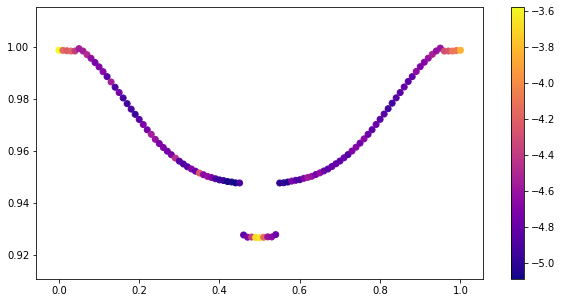

In [39]:
plt.figure(figsize=[10,5])
plt.scatter(np.linspace(0,1,101),lcs[10], c=np.log(importance), cmap='plasma')
plt.colorbar()

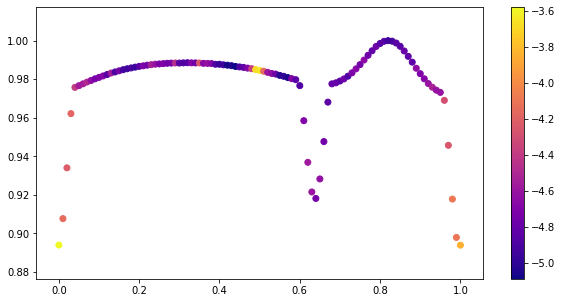

In [40]:
plt.figure(figsize=[10,5])
plt.scatter(np.linspace(0,1,101),lcs[230], c=np.log(importance), cmap='plasma')
plt.colorbar()

In [61]:
import umap

embedding = umap.UMAP().fit_transform(db_merged['lcs'])

/Users/danielhey/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


In [90]:
len(db_merged['lcs'][0])

201

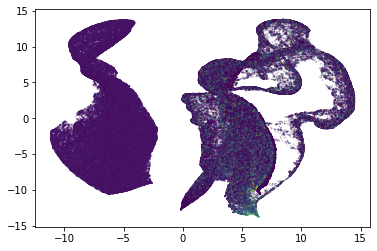

In [91]:
plt.scatter(embedding[:,0], embedding[:,1], c=db_merged['params'][:,0], s=0.1, alpha=0.5)

In [52]:
db_database_params['tratio'].max()

0.999999556960736

In [122]:
len(lcs[0])

101

In [123]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(5, weights='distance', metric='minkowski')
knn.fit(lcs, db_merged['params'])
# knn.predict(db_test[0][None,:])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [98]:
import glob
files = glob.glob('lcs/*.data')
i = 4

time, flux = np.loadtxt(files[i], usecols=(0,1)).T


In [111]:
db_merged['params'][0]

array([2.27305837e-01, 7.91579148e+01, 2.27814809e-01, 2.23204758e+01,
       4.11932841e+04, 1.57541847e+00, 1.30434783e-02, 2.94121221e+02])

In [113]:
np.sum(db_database,axis=-1).shape

(198942,)

In [116]:
lnlike = np.sum(db_database, axis=-1)**2

In [ ]:
X, Y = np.meshgrid(db_database_params[:,0],db_database_params[:,1])

In [127]:
X

(198942,)

In [90]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(5, weights='distance', metric='minkowski')
knn.fit(db_database, db_database_params)
# knn.predict(db_test[0][None,:])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [101]:
db_database_params[:,2].max()

0.6509275398831056

In [74]:
knn.predict(db_database[0][None,:])

array([[1.11534951e-02, 9.97769091e-01, 8.00829016e-02, 3.25956793e+02,
        7.49857297e+01, 4.61494416e-01, 2.67652738e+04, 9.00657169e-01]])

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

In [78]:
import glob
files = glob.glob('lcs/*.data')
time, flux = np.loadtxt(files[8], usecols=(0,1)).T

t0, period = 0., time[-1]
phase = (t0 % period) / period    
fold_time = (((time - phase * period) / period) % 1)
fold_time[fold_time > 0.5] -= 1
sorted_args = np.argsort(fold_time)

phase = fold_time[sorted_args]
flux = flux[sorted_args]

In [83]:
lc = lk.LightCurve(phase, flux)
binned = lc.bin(bins=101).normalize()

In [88]:
knn.predict(binned.flux[None,:])

array([[1.91712255e-01, 9.07387189e-01, 2.81611599e-02, 1.58398072e+02,
        8.42268448e+01, 6.80653217e-01, 7.63701197e+03, 5.10165899e-01]])

In [126]:
import pickle 

# Its important to use binary mode 
knnPickle = open('bunyip/knn/knnpickle_file', 'wb') 

# source, destination 
pickle.dump(knn, knnPickle)                      


In [127]:
loaded_model = pickle.load(open('bunyip/knn/knnpickle_file', 'rb'))

array([[7.88754200e-01, 3.36562628e-01, 1.57530075e-01, 1.70976664e+00,
        8.17431287e+01, 7.04421073e-02, 2.67380413e+02]])

In [39]:
pred = knn.predict(db_test)
for p, v in zip(pred[:10], db_test_params[:10]):
    for i, name in enumerate(db_param_names):
        print(f"{name}: {p[i]}, {v[i]}")
    print('\n')

q: 0.7887542002314014, 0.32657849375459524
r1: 0.33656262829936967, 0.31643436810643
r2: 0.15753007481419387, 0.1315511197396254
tratio: 1.709766640549351, 1.6595678753284564
incl: 81.7431286705456, 88.83284347380206
ecc: 0.07044210730175521, 0.05729541726731879
per0: 267.3804128888966, 321.2919051300077


q: 0.5292883288577294, 0.868999383900442
r1: 0.17698538482213824, 0.2116828295494508
r2: 0.14884892917303943, 0.1090452020451882
tratio: 1.0691637592503505, 0.734666997642872
incl: 60.07407212504974, 59.69778086713215
ecc: 0.4378670886857648, 0.4289652257783512
per0: 162.63515052387564, 160.21511193915447


q: 0.5943844027912252, 0.8592202632351995
r1: 0.1502635441916018, 0.11252398483937008
r2: 0.13192537609797012, 0.1507424288246008
tratio: 1.3743639155709804, 1.737357087900167
incl: 55.578815633715436, 62.32364868780536
ecc: 0.09217604016565785, 0.09248254059022354
per0: 39.869066995442616, 40.35394991435731


q: 0.6709804604303419, 0.8454092857126485
r1: 0.24658163252330348, 0.17